## Библиотеки: matplotlib, seaborn, funnel

Displot - distribution plot. (Показывает сколько значений имеется в ваших данных)

Box plot - помагает найти аномалии (найти выбросы). Делит на квартилии. Усы (по краям) - макс и мин значение данных

Pie Chart - процентное соотношение (деление на доли)

Heatmap - карта корреляций. связь между скалярными значениями. взаимосвязь. бывает позитивная и негативная


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

In [3]:
# preparing the data first
cities = df.groupby('locality_name').agg({'total_images': 'count'}).reset_index().sort_values(by='total_images', ascending=False)
cities = cities[cities['total_images'] > 50]
cities = cities.drop('total_images', axis=1)
data = cities.merge(df, on='locality_name', how='left')

In [4]:
data = data.drop_duplicates()

In [5]:
data['price_mln'] = data['last_price'] / 1000000

In [6]:
data['price_mln']

0        13.000
1         5.196
2        64.900
3        10.000
4         7.915
          ...  
21631     1.930
21632     1.800
21633     2.900
21634     1.950
21635     1.100
Name: price_mln, Length: 21636, dtype: float64

In [7]:
import matplotlib.pyplot as plt

In [8]:
pie = data.query('locality_name != "Санкт-Петербург"') # getting rid of the "Санкт-Петербург"

In [9]:
pie = pie.groupby('locality_name').agg({'total_images': 'sum'}).sort_values(by='total_images', ascending=False).reset_index()

In [10]:
pie = pie.rename({'total_images': 'amount_of_posts'}, axis=1)
pie

,locality_name,amount_of_posts
0,посёлок Мурино,4524
1,Всеволожск,4081
2,посёлок Шушары,3872
3,Пушкин,3443
4,Колпино,2993
5,посёлок Парголово,2843
6,Гатчина,2766
7,деревня Кудрово,2597
8,Выборг,2294
9,Петергоф,2088


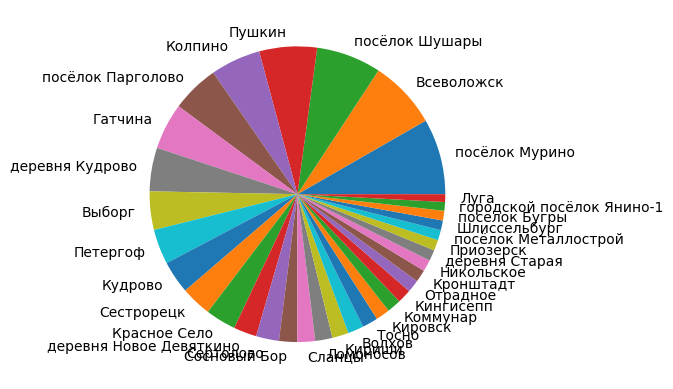

In [11]:
plt.pie(pie['amount_of_posts'], labels = pie['locality_name'])
plt.show()

In [12]:
import seaborn as sns

In [13]:
data.columns

Index(['locality_name', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_mln'],
      dtype='object')

<Axes: xlabel='ceiling_height'>

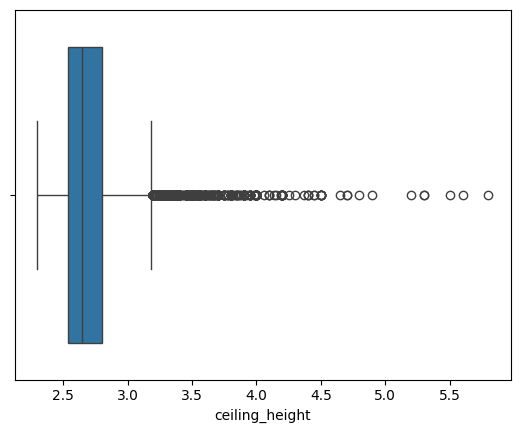

In [14]:
sns.boxplot(x = data.query('ceiling_height < 6 and ceiling_height > 2')['ceiling_height'])

<Axes: xlabel='ceiling_height'>

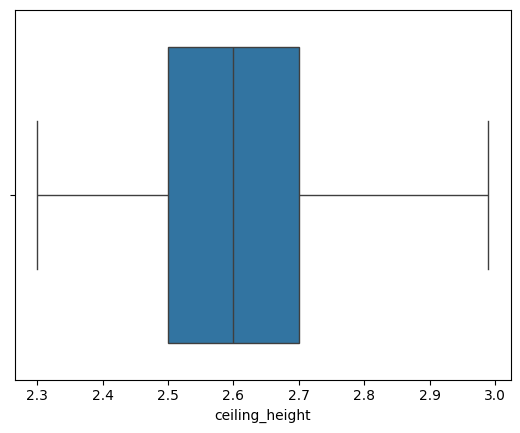

In [15]:
sns.boxplot(x = data.query('ceiling_height < 3 and ceiling_height > 2')['ceiling_height'])

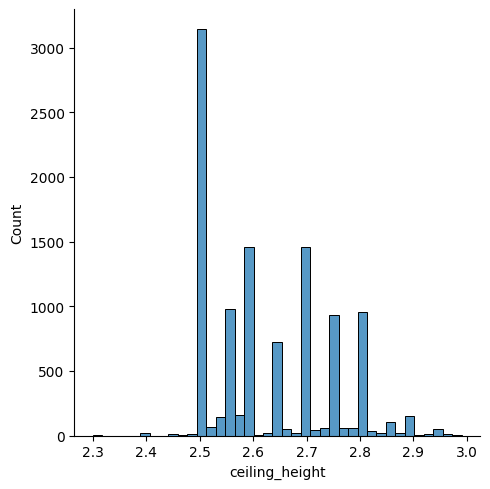

In [16]:
sns.displot(data.query('ceiling_height < 3 and ceiling_height > 2')['ceiling_height'])

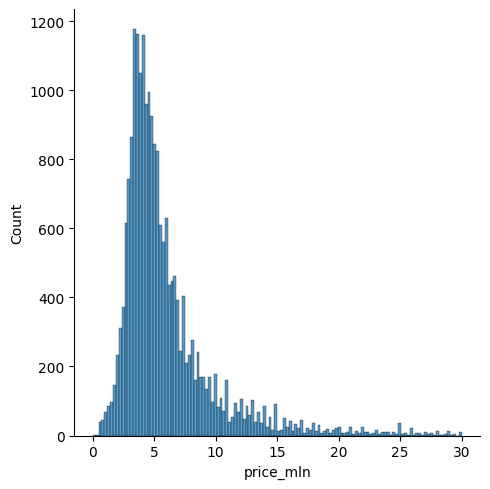

In [19]:
sns.displot(data.query('price_mln < 30')['price_mln'])

In [20]:
# Корреляция - это показатель отражающий взаимосвязь между объектами или событиями
data.corr()

ValueError: could not convert string to float: 'Санкт-Петербург'